In [1]:
from google.colab import drive
# drive.mount('/gdrive')
drive.mount('/content/drive')

Mounted at /content/drive


# Loading Dependencies

Includes
- Tensorflow_hub : Place where all tensorflow pretrained models are stored.
- Pandas : For data loading, manipulation and wrangling.
- Tensorflow_text : Allows addditional NLP text processing capablities outside scope of tensorflow
- Sklearn : For doing data evaluation and splitting
- Matplotlib : For visualization

In [2]:
# installing tensorflow_text
!pip install tensorflow-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 74.8 MB/s eta 0:00:00


In [3]:
import tensorflow_hub as hub
import pandas as pd
import tensorflow_text as text
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

# Loading Data

- Read Data
- Display data
USING PANDAS

In [ ]:
# from google.colab import files
# uploaded = files.upload()

Saving spam.csv to spam.csv


In [4]:
# import io
#Loading the data
# df = pd.read_csv(io.BytesIO(uploaded['spam.csv']))
df = pd.read_csv('/content/drive/MyDrive/Spam_Detection_In_Emails_Using_BERT-main/data_26142.csv', encoding='cp949')
# Dataset is now stored in a Pandas Dataframe

In [6]:
df.head(10)

,text,result
0,(현재 호텔주인 심정) 아18 난 마른하늘에 날벼락맞고 호텔망하게생겼는데 누군 계속...,1
1,....한국적인 미인의 대표적인 분...너무나 곱고아름다운모습...그모습뒤의 슬픔을...,0
2,"...못된 넘들...남의 고통을 즐겼던 넘들..이젠 마땅한 처벌을 받아야지..,그래...",1
3,"1,2화 어설펐는데 3,4화 지나서부터는 갈수록 너무 재밌던데",0
4,1. 사람 얼굴 손톱으로 긁은것은 인격살해이고2. 동영상이 몰카냐? 메걸리안들 생각...,1
5,10+8 진짜 이승기랑 비교된다,0
6,"100년안에 남녀간 성전쟁 한번 크게 치룬 후 일부다처제, 여성의 정치참여 금지, ...",1
7,10년뒤 윤서인은 분명히 재평가될것임. 말하나하나가 틀린게없음,0
8,10년만에 재미를 느끼는 프로였는데왜 니들때문에 폐지를해야되냐,1
9,10년차방탄팬인데 우리방탄처럼 성공은못하겠지만 일단 방탄의 부하가되고싶다는거니 이름...,1


# Data Analysis

- Check the description by grouping by category :
* no of data points for each category - count
* no of unique values in each category - unique




In [5]:
# check count and unique and top values and their frequency
df['result'].value_counts()

0    13178
1    12963
Name: result, dtype: int64

In [6]:
df.isnull()

,text,result
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
26136,False,False
26137,False,False
26138,False,False
26139,False,False


In [9]:
df.isnull().sum()

text      0
result    0
dtype: int64

**Clearly dataset is imbalanced - not so much but still it can affect our model. Need to use some type of regulariztion like downsampling dataset for mazority class**

# Downsampling Dataset 

**Includes:**
- Check percentage of unbalances.
- Creating 2 new dataframes out of existing one.
- Taking any random minority no of samples - `(747)` for majority class`(4825)`.
- Creating a balanced dataset by concating 2 new data frames.

In [7]:
# check percentange of data - states how much data needs to be balanced
str(round(747/4825,2))+'%'

'0.15%'

In [8]:
# creating 2 new dataframe as df_ham , df_spam

df_spam = df[df['result']==1]
print("Spam Dataset Shape:", df_spam.shape)

df_ham = df[df['result']==0]
print("Ham Dataset Shape:", df_ham.shape)

Spam Dataset Shape: (12963, 2)
Ham Dataset Shape: (13178, 2)


In [9]:
# downsampling ham dataset - take only random 747 example
# will use df_spam.shape[0] - 747

df_ham_downsampled = df_ham.sample(df_spam.shape[0])
df_ham_downsampled.shape

(12963, 2)

In [10]:
# concating both dataset - df_spam and df_ham_balanced to create df_balanced dataset
df_balanced = pd.concat([df_spam , df_ham_downsampled])
df_balanced.head()

,text,result
0,(현재 호텔주인 심정) 아18 난 마른하늘에 날벼락맞고 호텔망하게생겼는데 누군 계속...,1
2,"...못된 넘들...남의 고통을 즐겼던 넘들..이젠 마땅한 처벌을 받아야지..,그래...",1
4,1. 사람 얼굴 손톱으로 긁은것은 인격살해이고2. 동영상이 몰카냐? 메걸리안들 생각...,1
6,"100년안에 남녀간 성전쟁 한번 크게 치룬 후 일부다처제, 여성의 정치참여 금지, ...",1
8,10년만에 재미를 느끼는 프로였는데왜 니들때문에 폐지를해야되냐,1


In [11]:
df_balanced['result'].value_counts()

1    12963
0    12963
Name: result, dtype: int64

In [12]:
df_balanced.sample(10)

,text,result
21266,좁빠라라 어떻게 헤어져야 할지 모르겠어,1
17948,개늠 의외야,1
13587,더 책임지ㅣ는 구조로 바꿔나가야 합니다.,0
22439,조금 아픈가 보다 아주 쪼금,0
8225,개소리ㅁㅈㅎ,1
23448,엿먹어라 나 설레는데 혹시 썸?,1
7287,키가 넘 작음 박나래랑 똑같던데,0
16788,개씨발 성공하면 끝일줄 알았는데,1
25810,양아치 짝녀가 나한테 먼저 연락올 일은 없겠지?,1
6222,작가는 현실성 제로인듯..후덜덜 ..재결합? 결혼생활중 다른 여자 몸과 마음을 주물...,1


# Data Preparation



1. Create Numerical Repersentation Of Category - One hot encoding
* Create a new column
* Use `df[col].apply(lambda function)`
* Lambda Function - if spam return 1, else return 0 (for ham) - ternary operators : [`lambda x : value expression else value`]

In [13]:
# creating numerical repersentation of category - one hot encoding
df_balanced['spam'] = df_balanced['result'].apply(lambda x:1 if x==1 else 0)

In [14]:
# displaying data - spam -1 , ham-0
df_balanced.sample(4)

,text,result,spam
2506,명예훼손으로 고소하면 답나온다,0,0
15075,남친 생일선물 뭘 주면 좋을까,0,0
504,결론은 빠순이들이 문제라는거 아냐,1,1
20444,내조지 뒤숭숭하네.,1,1


2. Do train-test split
* split dataset into 80-20 ratio with 80% train and remaing as test
* for eveness of data we will use `stratify` agrument which ensures same ratio of both category is loaded for each case, even if one categoy has more training samples - prevents overfitting 

Store our data in: 
- `X_train, y_train` - traininge set(training_data and labels respectively)
- `X_test,, y_test` - testing set(testing_data and labels)

In [15]:
# loading train test split
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test , y_train, y_test = train_test_split(df_balanced['text'], df_balanced['spam'],
                                                    stratify = df_balanced['spam'], train_size=0.7, test_size=0.3)

In [17]:
# check for startification
y_train.value_counts()

1    9074
0    9074
Name: spam, dtype: int64

In [22]:
560/560

1.0

In [18]:
y_test.value_counts()

0    3889
1    3889
Name: spam, dtype: int64

In [24]:
187/187

1.0

***-> Almost similar, means data is downsampled now ***

# Model Creation 

## Downloading BERT

Model specification : 
- Layers - 12
- Hidden layers - 768 - embedding size
- Attention - 12
Name - Bert Small
---
This model has 2 parts:
- Bert_preprocessor - preprocess the text to be BERT ready
- Bert_encoder - do the actual encoding
---
Steps:
> Preprocessor
* create a keras hub layer from the preprocessing url 

> Encoder
* create a keras hub layer from the encoder/ model url



In [26]:
!pip install transformers
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 102.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 4.6 MB/s eta 0:00:00


In [19]:
# from transformers import BertTokenizer, TFBertModel

# bert_preprocessor = BertTokenizer.from_pretrained("monologg/kobert")
# bert_encoder = TFBertModel.from_pretrained("monologg/kobert", from_pt=True)

# downloading preprocessing files and model
bert_preprocessor = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3')
bert_encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4')


## Process And Encode Data

Use functional API to process and encode data in the layers itself

- Create a input layers with shape() , type - tf.string, and layer name - text - `TEXT_INPUT`

- Pass TEXT_INPUT into bert_prerocessor - `PREPROCESSED TEXT[*]`
- Pass the above[*] to encoder - `EMBED1`
- pass pooled_outputs of EMBEED to dropout layer - `DROPOUT`
- create a dense layer with activation as `sigmoid` `OUTPUTS`
- Create out MODEL (inputs - text_input, outputs - dropout) 

In [20]:
import tensorflow as tf

In [21]:
text_input = tf.keras.layers.Input(shape = (), dtype = tf.string, name = 'Inputs')
print("Text Input: ",text_input,"\n")
preprocessed_text = bert_preprocessor(text_input)
print("Pre-processed text: ",preprocessed_text,"\n")
embed1 = bert_encoder(preprocessed_text)
print("Encoding on pre-processed text: ",embed1,"\n")
dropout = tf.keras.layers.Dropout(0.1, name = 'Dropout')(embed1['pooled_output'])
outputs = tf.keras.layers.Dense(1, activation = 'sigmoid', name = 'Dense')(dropout)

# creating final model
final_model = tf.keras.Model(inputs = [text_input], outputs = [outputs])

Text Input:  KerasTensor(type_spec=TensorSpec(shape=(None,), dtype=tf.string, name='Inputs'), name='Inputs', description="created by layer 'Inputs'") 

Pre-processed text:  {'input_type_ids': <KerasTensor: shape=(None, 128) dtype=int32 (created by layer 'keras_layer')>, 'input_mask': <KerasTensor: shape=(None, 128) dtype=int32 (created by layer 'keras_layer')>, 'input_word_ids': <KerasTensor: shape=(None, 128) dtype=int32 (created by layer 'keras_layer')>} 

Encoding on pre-processed text:  {'pooled_output': <KerasTensor: shape=(None, 768) dtype=float32 (created by layer 'keras_layer_1')>, 'default': <KerasTensor: shape=(None, 768) dtype=float32 (created by layer 'keras_layer_1')>, 'sequence_output': <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'keras_layer_1')>, 'encoder_outputs': [<KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'keras_layer_1')>, <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'keras_layer_1')>, <Keras

In [22]:
# check summary of model
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Inputs (InputLayer)            [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_type_ids':   0           ['Inputs[0][0]']                 
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

##  Compiling model

- Optimizer - ADAM
- Loss - binary_crossentropy
- metrics - accuracy , precesion and recall

In [23]:
Metrics = [tf.keras.metrics.BinaryAccuracy(name = 'accuracy'),
           tf.keras.metrics.Precision(name = 'precision'),
           tf.keras.metrics.Recall(name = 'recall')
           ]

final_model.compile(optimizer ='adam',
               loss = 'binary_crossentropy',
               metrics = Metrics)

In [24]:
#@title Optional 
# optional - defining tensorflow callbacks
import tensorflow as tf
import datetime
%load_ext tensorboard

!rm -rf ./logs/
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [25]:
history = final_model.fit(X_train, y_train, epochs = 20 , callbacks = [tensorboard_callback])

Epoch 1/20
568/568 [==============================] - 236s 381ms/step - loss: 0.7069 - accuracy: 0.5148 - precision: 0.5150 - recall: 0.5089
Epoch 2/20
568/568 [==============================] - 221s 389ms/step - loss: 0.6970 - accuracy: 0.5425 - precision: 0.5423 - recall: 0.5456
Epoch 3/20
568/568 [==============================] - 222s 391ms/step - loss: 0.6937 - accuracy: 0.5461 - precision: 0.5461 - recall: 0.5461
Epoch 4/20
568/568 [==============================] - 222s 390ms/step - loss: 0.6877 - accuracy: 0.5581 - precision: 0.5593 - recall: 0.5484
Epoch 5/20
568/568 [==============================] - 222s 390ms/step - loss: 0.6822 - accuracy: 0.5681 - precision: 0.5697 - recall: 0.5566
Epoch 6/20
568/568 [==============================] - 220s 387ms/step - loss: 0.6833 - accuracy: 0.5657 - precision: 0.5662 - recall: 0.5626
Epoch 7/20
568/568 [==============================] - 220s 387ms/step - loss: 0.6797 - accuracy: 0.5753 - precision: 0.5769 - recall: 0.5645
Epoch 8/20
56

In [27]:
# 모델 저장 경로 지정
model_save_path = '/content/drive/MyDrive/Spam_Detection_In_Emails_Using_BERT-main/my_model'

# 모델 저장
final_model.save(model_save_path)

In [28]:
# 모델 불러오기
loaded_model = tf.keras.models.load_model(model_save_path)

# 모델 평가
loaded_model.evaluate(X_test, y_test)


244/244 [==============================] - 81s 328ms/step - loss: 0.7062 - accuracy: 0.5311 - precision: 0.5168 - recall: 0.9596


[0.7061741352081299,
 0.5311133861541748,
 0.5167543888092041,
 0.9596297144889832]

# Model Evaluation 

- Evaulating model performance 
using `model.evaluate(X_test, y_test)`

- Predicting X_test - `y_pred`
-- Checking its values as 1 or 0 
- Getting Confusion matrix
-- Flattening y_pred 
-- Ploting consufion matrix

- Getting classification report 

In [29]:
# Evaluating performace
final_model.evaluate(X_test,y_test)

244/244 [==============================] - 84s 337ms/step - loss: 0.7062 - accuracy: 0.5311 - precision: 0.5168 - recall: 0.9596


[0.7061741352081299,
 0.5311133861541748,
 0.5167543888092041,
 0.9596297144889832]

In [30]:
# getting y_pred by predicting over X_text and flattening it
y_pred = final_model.predict(X_test)
y_pred = y_pred.flatten() # require to be in one dimensional array , for easy maniputation

244/244 [==============================] - 83s 338ms/step


In [31]:
# checking the results y_pred
import numpy as np

y_pred = np.where(y_pred>0.5,1,0 )
y_pred 

array([1, 1, 1, ..., 0, 1, 1])

In [32]:
# importing consfusion maxtrix
from sklearn.metrics import confusion_matrix , classification_report

In [33]:
# creating confusion matrix 
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 399, 3490],
       [ 157, 3732]])

In [34]:
# plotting as graph - importing seaborn
import seaborn as sns

Text(50.722222222222214, 0.5, 'Actual value')

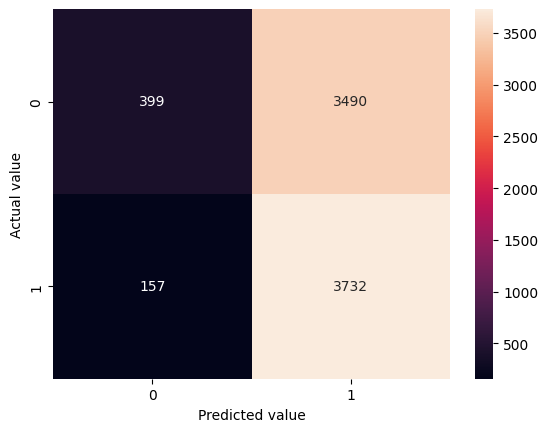

In [35]:
# creating a graph out of confusion matrix
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted value')
plt.ylabel('Actual value')

In [36]:
# printing classification report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.72      0.10      0.18      3889
           1       0.52      0.96      0.67      3889

    accuracy                           0.53      7778
   macro avg       0.62      0.53      0.43      7778
weighted avg       0.62      0.53      0.43      7778



**Good Precesion And Recall Score, but can be improved** 

# Model Prediction

- We will be predicting data on text coprus,
value > 5 is most likely be `spam`

In [ ]:
prediction_test_sentences = [
                #ham
                'The article was published on 120h December.',
                'Please let me know when you will be free to make it to Bangalore.',
                'Although we are unable to give you an exact time-frame at the moment, I would request you to stay tuned for any updates.',
                

                # Spam
                'Your account will be blocked unless you cange your password using the link below. Please log in to to secure your account and prevent deactivation ',
                'Congratulations! You have won Rs.1,00,000 from the ABC lottery. Please click on the link below to avail the prize money', 
                'Amazon is sending you a refund of Rs.8000 for the product returned previoulsy. Please reply with your bank account details to verify and get your refund'
]

In [63]:
prediction_test_sentences = [
                # Spam
                '지랼 회사에서 어떤 사람이랑 자꾸 눈 마추쳐.',
                '● 꼰대들 특징: 나 때는 말이야~ 누가 뭐라고 괴롭히든 다 참고 버티고 다녔어~ 그만한 일로 그러냐ㅉㅉ 약해빠져가지구 ㅉㅉ 원래 사회 생활이 그래~~', 
                '★속보★!!!! ㅈ됐다~~!!!! 국민가수 조용필도 빨갱이다~~ 마!! 조용필이 저거 고향이 으데고?? 전라도 아이라 카이??',
                '40-50대로 가야지..할매를 부르면 우야노',
                '40대 아줌마 지들 자식들은 피씨방에 있고 엄마들은 방탄 동영상 처보고 있다고 생각해봐라 그래놓고 경포대 문재인 아몰랑 지지하고 어후 토나와',
                '40대 아줌마들 댓글비율좀봐....',
                '40대 여자들이 나이값못하고 현빈 멋있다고 하악하악 거리는거 개극혐ㅋㅋㅋㅋ당신들의 튀어나온 뱃살과 흉측한 얼굴을보고 반성하길바람^^;;;',
                '40대 이모라 집중이 안됨... 20살 초반으로좀 캐스팅좀 ㅠㅜㅠㅜ',
                '40대늙은이 32% 돌아이련들...쯧쯧쯧',
                '40살에 폐경에 다리까지 노답이라이 ㅋㅋㅋ',
                '40살여자랑 로맨스 ㅋㅋ별로다',
                '40세 이상 한녀들은 임신도 못하는 사실상 쓸모없는 분리수거 대상',
                '40이다 상관 없다는 넘들 애들이군',
                '43.1 이라 .. 행복해서 살쪘다는걸 보여주고싶은건가? 아니면 임...신?',
                '45가 정상인가? 애들이 따라할까 무섭다',

                #ham
                '사랑해 행복해 축하해',
                '한 눈에 반했어. 그녀한테 좋아한다고 해도 될까.',
                '한 사람만 죽을 때까지 사랑할 수 있을까?'
]

In [64]:
test_results = final_model.predict(prediction_test_sentences)

1/1 [==============================] - 0s 114ms/step


In [68]:
output = np.where(test_results>0.65,'spam', 'ham') 

In [69]:
output

array([['spam'],
       ['spam'],
       ['ham'],
       ['spam'],
       ['spam'],
       ['ham'],
       ['ham'],
       ['spam'],
       ['spam'],
       ['ham'],
       ['ham'],
       ['spam'],
       ['ham'],
       ['ham'],
       ['ham'],
       ['ham'],
       ['ham'],
       ['ham']], dtype='<U4')

In [67]:
test_results

array([[0.70760214],
       [0.6855084 ],
       [0.63257617],
       [0.69933933],
       [0.72191805],
       [0.6113252 ],
       [0.62857926],
       [0.7014803 ],
       [0.79781526],
       [0.60499483],
       [0.5456267 ],
       [0.65578073],
       [0.60995406],
       [0.6355543 ],
       [0.6299374 ],
       [0.62494195],
       [0.6115767 ],
       [0.6380944 ]], dtype=float32)